# 학습 관련 기술
## 매개변수 갱신
- 최적화: 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾아내는 문제를 푸는 것을 의미한다.
- 매개변수 값을 찾기 위해 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신한다. => 확률적 경사 하강법(SGD)

### 확률적 경사하강법
- 식
$$ W \leftarrow W - \eta \frac{∂L}{∂W} $$

In [ ]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

- 특징
  - 장점: 단순하고 구현하기 쉽자.
  - 단점
    - 비등방성 함수에서는 탐색 경로가 비효율적이다.
    - 지그재그로 탐색하게 된다.(기울어진 방향이 본래의 최솟값과 다른 방향을 가르키게 된다.)
- 해결방안: 모멘텀, AdaGrad, Adam 방법으로 단점을 개선


### 모멘텀
- '운동량'을 뜻한다.
- 식
$$ v ←av - \eta \frac{∂L}{∂W} $$
$$ W ←W + v $$
- 기울기 방향으로 힘을 받아 물체가 가속되게 된다.
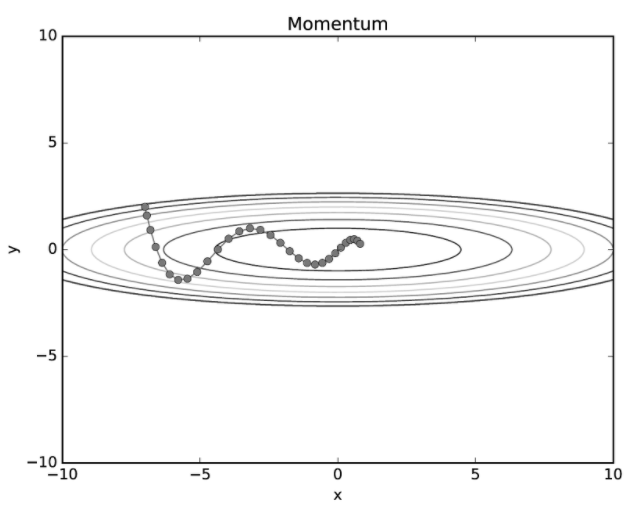

In [ ]:
import numpy as np

class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
      params[key] += self.v[key]

### AdaGrad
- 신경망 학습에서는 학습률 값이 중요하다.
- 학습률 감소: 합습률 정하는 효과적 기술로 처음에는 크게 학습하다가 조금씩 작게 학습한다는 의미이다.
- '각각의' 매개변수에 '맞춤형' 값을 만들어준다.
- 수식
$$ h ← h + \frac{∂L}{∂W} \odot  \frac{∂L}{∂W} $$
$$ W ← W - \eta \frac{1}{\sqrt{h}} \frac{∂L}{∂W} $$
- 최솟값을 향해 움직인다.
- 갱신 강도가 빠르게 약해지고 지그재그 움직임이 줄어든다.
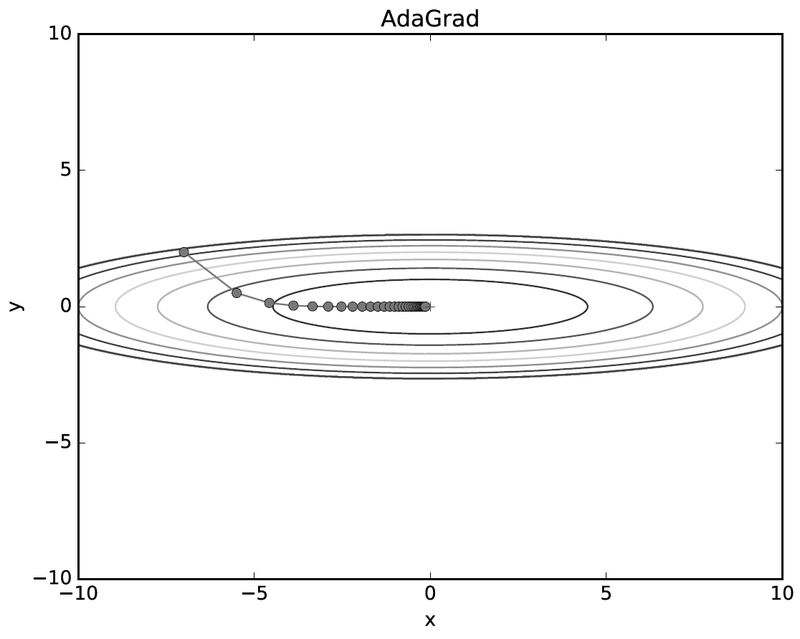

In [ ]:
class AdaGrad:
  def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

  def update(self, params, grads):
      if self.h is None:
          self.h = {}
          for key, val in params.items():
              self.h[key] = np.zeros_like(val)

      for key in params.keys():
          self.h[key] += grads[key] * grads[key]
          params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)


### Adam
- 공이 그릇 바닥을 구르는 듯한 움직임
- 모멘텀과 AdaGrad를 융합한 기법
- 매개변수 공간을 효율적으로 탐색하면서 하이퍼 파라미터의 편향 보정이 진행된다.
- 하이퍼파라미터 종류: 학습률, 일차 모멘트용 계수, 이차 모멘트용 계수

In [ ]:
class Adam:
  def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
    self.lr = lr
    self.beta1 = beta1
    self.beta2 = beta2
    self.iter = 0
    self.m = None
    self.v = None

  def update(self, params, grads):
    if self.m is None:
      self.m, self.v = {}, {}
      for key, val in params.items():
          self.m[key] = np.zeros_like(val)
          self.v[key] = np.zeros_like(val)

    self.iter += 1
    lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

    for key in params.keys():
        #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
        #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
        self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
        self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])

        params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

        #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
        #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
        #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

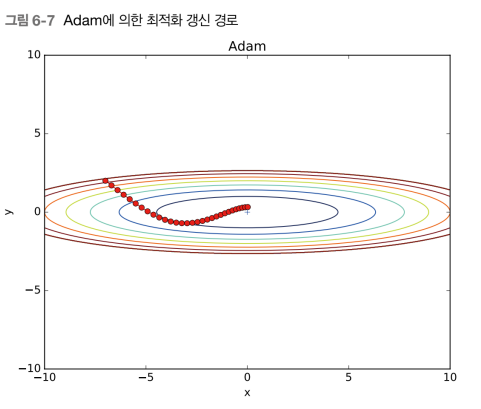

### MNIST 데이터셋으로 본 갱신 방법 비교

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
===========iteration:0===========
SGD:2.3465171702712855
Momentum:2.3389412889597923
AdaGrad:2.152998714000566
Adam:2.17042135592576
===========iteration:100===========
SGD:1.8027854477480023
Momentum:0.3165955799417489
AdaGrad:0.13396283334730333
Adam:0.3180997784977132
===========iteration:200===========
SGD:1.0653728803515095
Momentum:0.2915716537617358
AdaGrad:0.11468822083708981
Adam:0.18897890781748886
===========iteration:300===========
SGD:0.6133058543064608
Momentum:0.2673076066086997
AdaGrad:0.12077158790083042
Adam:0.22537906455478723
===========iteration:400===========
SGD:0.5046781251610444
Momentum:0.2310084085076229
AdaGrad:0.0748294114701658
Adam:0.19355665722481513
===========i

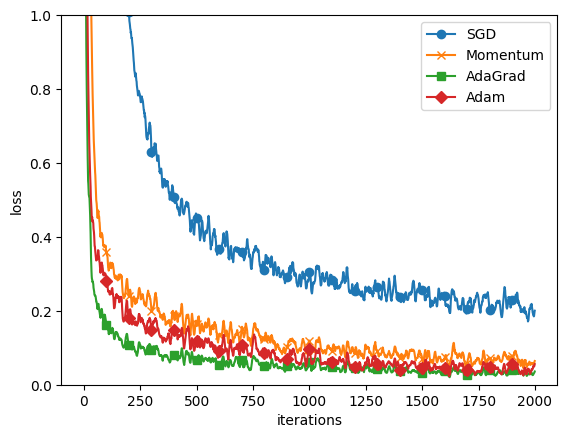

In [ ]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 가중치의 초기값
신경망 학습에서 특히 중요한 것은 가중치이 초기값이다.
### 초기값을 0으로 하면?
- 가중치 감소
  - 오버피팅을 억제해 범용 성능을 높인다.
  - 가중치 매개변수 값이 작아지도록 학습
- 초기값을 모두 0으로 하면 학습이 올바로 이뤄지지 않는다
  - 오차역전파법에서 모두 가중치의 값이 똑같이 갱신되기 때문
- 초기값을 무작위로 설정해야 한다.

### 은닉층의 활성화값 분포
- 기울기 소실: 데이터가 0과 1에 칭쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다.
- 활성화값들이 치우치면 표현력을 제한한다.
- Xavier 초기값: 앞 층에 노드가 많을수록 대상 노드의 초기값으로 설정하는 가중치가 좁게 퍼진다.

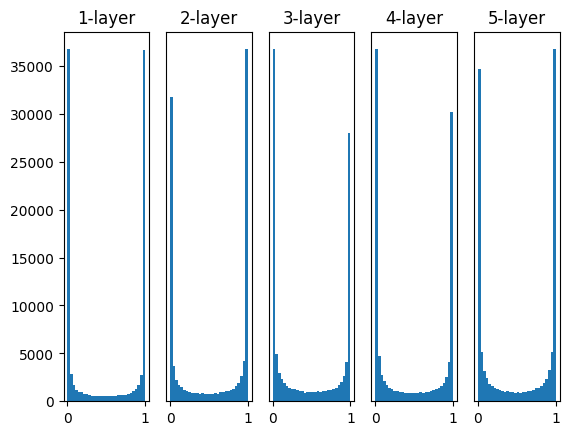

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    #w = np.random.randn(node_num, node_num) * 0.01
    #w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    #w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    #z = ReLU(a)
    #z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### ReLU를 사용할 때의 가중치 초기값
- Xavier 초기값은 활성화 함수가 선형인 것이 전제되어있음
- ReLU를 사용할 때는 ReLU에 특화된 초기값인 He 초기값을 사용
  - He 초기값: 앞 계층의 노드가 n일때 표준편차가 $\sqrt\frac{2}{n}$인 정규분포를 사용한다.

### MNIST 데이터셋으로 본 가중치 초기값 비교


===========iteration:0===========
std=0.01:2.302533790493868
Xavier:2.3101159667202427
He:2.4517482214330264
===========iteration:100===========
std=0.01:2.301964694580797
Xavier:2.2454669885458003
He:1.6397832894993352
===========iteration:200===========
std=0.01:2.303268011961597
Xavier:2.1630387634829376
He:1.0277994504367283
===========iteration:300===========
std=0.01:2.3032417916040204
Xavier:1.8773521328654623
He:0.5786271505751055
===========iteration:400===========
std=0.01:2.300355429361237
Xavier:1.2754590747522307
He:0.37822312186628276
===========iteration:500===========
std=0.01:2.300708916764556
Xavier:0.9559333440597926
He:0.3748907209555602
===========iteration:600===========
std=0.01:2.3016324014134124
Xavier:0.7175564636856915
He:0.3588207377062315
===========iteration:700===========
std=0.01:2.293660589633228
Xavier:0.5488662655122961
He:0.29766119124983914
===========iteration:800===========
std=0.01:2.3034844551883107
Xavier:0.5426254226343792
He:0.357463738863851

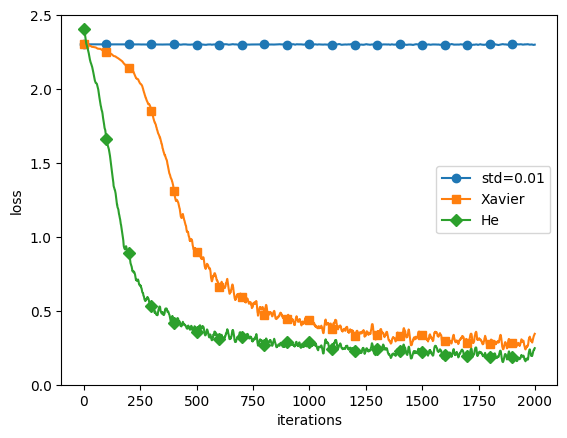

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

## 배치 정규화
### 배치 정규화 알고리즘
- 배치 정규화 기본 아이디어: 각 층에서의 활성화값이 적당히 분포되도록 조정한다.
- 배치 정규화가 주목 받는 이유
  - 학습을 빨리 진행할 수 있다
  - 초깃값에 크게 의존하지 않는다
  - 오버피팅을 억제한다.
- 배치 정규화 수식

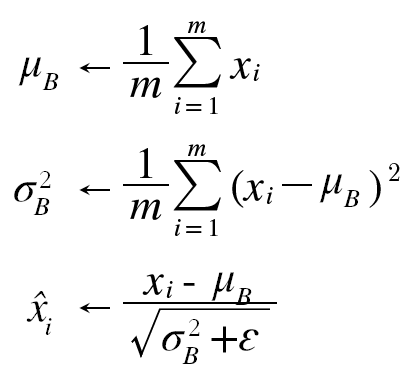

- 배치 정규화 계층마다 정규화된 데이터에 고유한 확대와 이동 변환을 수행
- 배치 정규화 계층 수식
$$y_i \leftarrow \gamma \hat{x}_i + \beta$$

### 배치 정규화의 효과
- 배치 정규화를 사용할 때 학습 진도가 빠르다

============== 1/16 ==============
epoch:0 | 0.094 - 0.103
epoch:1 | 0.097 - 0.123
epoch:2 | 0.097 - 0.137
epoch:3 | 0.097 - 0.148
epoch:4 | 0.097 - 0.182
epoch:5 | 0.097 - 0.193
epoch:6 | 0.097 - 0.215
epoch:7 | 0.097 - 0.246
epoch:8 | 0.097 - 0.258
epoch:9 | 0.097 - 0.268
epoch:10 | 0.097 - 0.287
epoch:11 | 0.097 - 0.302
epoch:12 | 0.097 - 0.325
epoch:13 | 0.097 - 0.354
epoch:14 | 0.097 - 0.364
epoch:15 | 0.097 - 0.377
epoch:16 | 0.097 - 0.399
epoch:17 | 0.097 - 0.41
epoch:18 | 0.097 - 0.414


epoch:19 | 0.097 - 0.43
============== 2/16 ==============
epoch:0 | 0.097 - 0.102
epoch:1 | 0.097 - 0.11
epoch:2 | 0.097 - 0.14
epoch:3 | 0.097 - 0.161
epoch:4 | 0.097 - 0.182
epoch:5 | 0.097 - 0.216
epoch:6 | 0.097 - 0.25
epoch:7 | 0.097 - 0.266
epoch:8 | 0.097 - 0.297
epoch:9 | 0.097 - 0.327
epoch:10 | 0.097 - 0.355
epoch:11 | 0.097 - 0.378
epoch:12 | 0.097 - 0.392
epoch:13 | 0.097 - 0.422
epoch:14 | 0.097 - 0.433
epoch:15 | 0.097 - 0.457
epoch:16 | 0.097 - 0.476
epoch:17 | 0.097 - 0.494
epoch:18 | 0.097 - 0.494


epoch:19 | 0.097 - 0.517
============== 3/16 ==============
epoch:0 | 0.14 - 0.124
epoch:1 | 0.342 - 0.114
epoch:2 | 0.469 - 0.16
epoch:3 | 0.601 - 0.214
epoch:4 | 0.657 - 0.256
epoch:5 | 0.725 - 0.284
epoch:6 | 0.774 - 0.324
epoch:7 | 0.817 - 0.372
epoch:8 | 0.857 - 0.411
epoch:9 | 0.884 - 0.445
epoch:10 | 0.901 - 0.465
epoch:11 | 0.929 - 0.501
epoch:12 | 0.946 - 0.518
epoch:13 | 0.956 - 0.531
epoch:14 | 0.965 - 0.569
epoch:15 | 0.966 - 0.589
epoch:16 | 0.97 - 0.605
epoch:17 | 0.978 - 0.627
epoch:18 | 0.98 - 0.633


epoch:19 | 0.983 - 0.645
============== 4/16 ==============
epoch:0 | 0.094 - 0.126
epoch:1 | 0.172 - 0.125
epoch:2 | 0.274 - 0.18
epoch:3 | 0.361 - 0.264
epoch:4 | 0.445 - 0.334
epoch:5 | 0.514 - 0.381
epoch:6 | 0.577 - 0.438
epoch:7 | 0.617 - 0.488
epoch:8 | 0.658 - 0.523
epoch:9 | 0.695 - 0.557
epoch:10 | 0.705 - 0.591
epoch:11 | 0.742 - 0.625
epoch:12 | 0.747 - 0.653
epoch:13 | 0.779 - 0.666
epoch:14 | 0.793 - 0.695
epoch:15 | 0.803 - 0.71
epoch:16 | 0.809 - 0.729
epoch:17 | 0.822 - 0.743
epoch:18 | 0.834 - 0.751


epoch:19 | 0.834 - 0.766
============== 5/16 ==============
epoch:0 | 0.111 - 0.088
epoch:1 | 0.124 - 0.143
epoch:2 | 0.131 - 0.262
epoch:3 | 0.131 - 0.407
epoch:4 | 0.153 - 0.518
epoch:5 | 0.16 - 0.583
epoch:6 | 0.167 - 0.644
epoch:7 | 0.179 - 0.686
epoch:8 | 0.189 - 0.717
epoch:9 | 0.194 - 0.754
epoch:10 | 0.209 - 0.774
epoch:11 | 0.213 - 0.794
epoch:12 | 0.221 - 0.809
epoch:13 | 0.228 - 0.822
epoch:14 | 0.241 - 0.831
epoch:15 | 0.245 - 0.84
epoch:16 | 0.256 - 0.847
epoch:17 | 0.264 - 0.86
epoch:18 | 0.268 - 0.86


epoch:19 | 0.277 - 0.873
============== 6/16 ==============
epoch:0 | 0.128 - 0.096
epoch:1 | 0.128 - 0.243
epoch:2 | 0.185 - 0.498
epoch:3 | 0.117 - 0.621
epoch:4 | 0.117 - 0.679
epoch:5 | 0.117 - 0.744
epoch:6 | 0.117 - 0.788
epoch:7 | 0.117 - 0.822
epoch:8 | 0.117 - 0.834
epoch:9 | 0.117 - 0.853
epoch:10 | 0.117 - 0.864
epoch:11 | 0.117 - 0.881
epoch:12 | 0.117 - 0.89
epoch:13 | 0.117 - 0.898
epoch:14 | 0.117 - 0.913
epoch:15 | 0.117 - 0.923
epoch:16 | 0.117 - 0.93
epoch:17 | 0.117 - 0.941
epoch:18 | 0.117 - 0.944


epoch:19 | 0.117 - 0.95
============== 7/16 ==============
epoch:0 | 0.116 - 0.089
epoch:1 | 0.105 - 0.254
epoch:2 | 0.117 - 0.572
epoch:3 | 0.117 - 0.689
epoch:4 | 0.117 - 0.742
epoch:5 | 0.117 - 0.799
epoch:6 | 0.117 - 0.85
epoch:7 | 0.117 - 0.878
epoch:8 | 0.117 - 0.891
epoch:9 | 0.117 - 0.918
epoch:10 | 0.117 - 0.924
epoch:11 | 0.117 - 0.941
epoch:12 | 0.117 - 0.948
epoch:13 | 0.117 - 0.963
epoch:14 | 0.117 - 0.975
epoch:15 | 0.117 - 0.984
epoch:16 | 0.117 - 0.985
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.986


epoch:19 | 0.117 - 0.991
============== 8/16 ==============
epoch:0 | 0.099 - 0.083
epoch:1 | 0.117 - 0.322
epoch:2 | 0.117 - 0.688
epoch:3 | 0.117 - 0.773
epoch:4 | 0.117 - 0.823
epoch:5 | 0.117 - 0.881
epoch:6 | 0.117 - 0.916
epoch:7 | 0.117 - 0.939
epoch:8 | 0.117 - 0.961
epoch:9 | 0.117 - 0.97
epoch:10 | 0.117 - 0.974
epoch:11 | 0.117 - 0.987
epoch:12 | 0.117 - 0.99
epoch:13 | 0.117 - 0.992
epoch:14 | 0.117 - 0.993
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.997
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 1.0


epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.116 - 0.123
epoch:1 | 0.116 - 0.444
epoch:2 | 0.117 - 0.733
epoch:3 | 0.116 - 0.846
epoch:4 | 0.116 - 0.904
epoch:5 | 0.116 - 0.934
epoch:6 | 0.117 - 0.959
epoch:7 | 0.117 - 0.979
epoch:8 | 0.117 - 0.986
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.993
epoch:11 | 0.116 - 0.997
epoch:12 | 0.116 - 0.998
epoch:13 | 0.117 - 0.998
epoch:14 | 0.116 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.116 - 0.999


epoch:19 | 0.116 - 0.999
============== 10/16 ==============
epoch:0 | 0.092 - 0.164
epoch:1 | 0.117 - 0.706
epoch:2 | 0.117 - 0.823
epoch:3 | 0.117 - 0.855
epoch:4 | 0.117 - 0.892
epoch:5 | 0.117 - 0.86
epoch:6 | 0.117 - 0.965
epoch:7 | 0.117 - 0.987
epoch:8 | 0.117 - 0.987
epoch:9 | 0.117 - 0.992
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.994
epoch:14 | 0.117 - 0.987
epoch:15 | 0.117 - 0.994
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.996


epoch:19 | 0.117 - 0.997
============== 11/16 ==============
epoch:0 | 0.116 - 0.152
epoch:1 | 0.105 - 0.512
epoch:2 | 0.105 - 0.717
epoch:3 | 0.105 - 0.826
epoch:4 | 0.105 - 0.806
epoch:5 | 0.105 - 0.859
epoch:6 | 0.105 - 0.872
epoch:7 | 0.105 - 0.914
epoch:8 | 0.105 - 0.973
epoch:9 | 0.105 - 0.961
epoch:10 | 0.105 - 0.977
epoch:11 | 0.117 - 0.99
epoch:12 | 0.116 - 0.991
epoch:13 | 0.116 - 0.993
epoch:14 | 0.116 - 0.977
epoch:15 | 0.116 - 0.993
epoch:16 | 0.117 - 0.993
epoch:17 | 0.116 - 0.993
epoch:18 | 0.116 - 0.995


epoch:19 | 0.116 - 0.996
============== 12/16 ==============
epoch:0 | 0.1 - 0.121
epoch:1 | 0.117 - 0.489
epoch:2 | 0.117 - 0.593
epoch:3 | 0.117 - 0.615
epoch:4 | 0.117 - 0.628
epoch:5 | 0.117 - 0.656
epoch:6 | 0.117 - 0.642
epoch:7 | 0.117 - 0.681
epoch:8 | 0.117 - 0.694
epoch:9 | 0.117 - 0.7
epoch:10 | 0.117 - 0.707
epoch:11 | 0.117 - 0.692
epoch:12 | 0.117 - 0.704
epoch:13 | 0.117 - 0.709
epoch:14 | 0.117 - 0.63
epoch:15 | 0.117 - 0.696
epoch:16 | 0.117 - 0.691
epoch:17 | 0.117 - 0.711
epoch:18 | 0.117 - 0.69


epoch:19 | 0.117 - 0.707
============== 13/16 ==============
epoch:0 | 0.1 - 0.099
epoch:1 | 0.117 - 0.45
epoch:2 | 0.116 - 0.466
epoch:3 | 0.116 - 0.539
epoch:4 | 0.116 - 0.592
epoch:5 | 0.116 - 0.589
epoch:6 | 0.116 - 0.593
epoch:7 | 0.116 - 0.566
epoch:8 | 0.116 - 0.609
epoch:9 | 0.116 - 0.603
epoch:10 | 0.116 - 0.614
epoch:11 | 0.116 - 0.609
epoch:12 | 0.116 - 0.612
epoch:13 | 0.116 - 0.617
epoch:14 | 0.116 - 0.614
epoch:15 | 0.116 - 0.623
epoch:16 | 0.116 - 0.618
epoch:17 | 0.116 - 0.619
epoch:18 | 0.116 - 0.625


epoch:19 | 0.116 - 0.625
============== 14/16 ==============
epoch:0 | 0.1 - 0.125
epoch:1 | 0.117 - 0.363
epoch:2 | 0.117 - 0.433
epoch:3 | 0.117 - 0.458
epoch:4 | 0.117 - 0.473
epoch:5 | 0.117 - 0.484
epoch:6 | 0.116 - 0.483
epoch:7 | 0.116 - 0.515
epoch:8 | 0.117 - 0.515
epoch:9 | 0.117 - 0.518
epoch:10 | 0.117 - 0.511
epoch:11 | 0.117 - 0.519
epoch:12 | 0.117 - 0.514
epoch:13 | 0.117 - 0.519
epoch:14 | 0.117 - 0.524
epoch:15 | 0.117 - 0.524
epoch:16 | 0.117 - 0.523
epoch:17 | 0.117 - 0.523
epoch:18 | 0.117 - 0.524
epoch:19 | 0.117 - 0.525


============== 15/16 ==============
epoch:0 | 0.105 - 0.121
epoch:1 | 0.116 - 0.346
epoch:2 | 0.117 - 0.335
epoch:3 | 0.117 - 0.494
epoch:4 | 0.117 - 0.506
epoch:5 | 0.117 - 0.508
epoch:6 | 0.117 - 0.516
epoch:7 | 0.117 - 0.513
epoch:8 | 0.117 - 0.511
epoch:9 | 0.117 - 0.514
epoch:10 | 0.117 - 0.511
epoch:11 | 0.117 - 0.517
epoch:12 | 0.117 - 0.518
epoch:13 | 0.117 - 0.522
epoch:14 | 0.117 - 0.519
epoch:15 | 0.116 - 0.522
epoch:16 | 0.116 - 0.42
epoch:17 | 0.116 - 0.519
epoch:18 | 0.117 - 0.524


epoch:19 | 0.117 - 0.524
============== 16/16 ==============
epoch:0 | 0.087 - 0.087
epoch:1 | 0.116 - 0.281
epoch:2 | 0.116 - 0.389
epoch:3 | 0.116 - 0.4
epoch:4 | 0.116 - 0.408
epoch:5 | 0.116 - 0.422
epoch:6 | 0.116 - 0.469
epoch:7 | 0.116 - 0.507
epoch:8 | 0.116 - 0.409
epoch:9 | 0.116 - 0.424
epoch:10 | 0.116 - 0.296
epoch:11 | 0.116 - 0.485
epoch:12 | 0.116 - 0.517
epoch:13 | 0.116 - 0.524
epoch:14 | 0.116 - 0.527
epoch:15 | 0.116 - 0.533
epoch:16 | 0.116 - 0.517
epoch:17 | 0.117 - 0.508
epoch:18 | 0.117 - 0.515
epoch:19 | 0.116 - 0.511


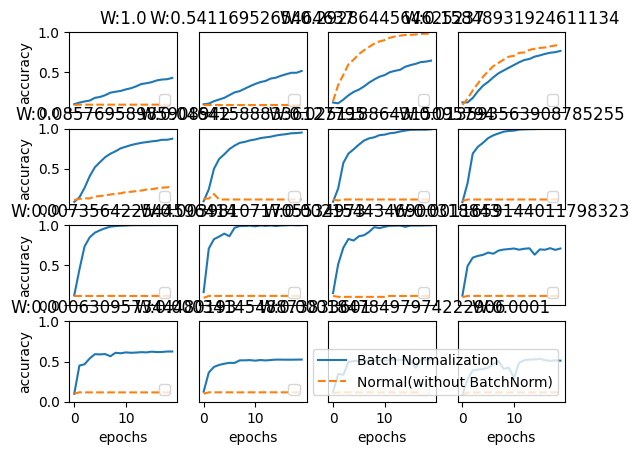

<Figure size 100000x500000 with 0 Axes>

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
plt.figure(figsize=(1000,5000))
plt.show()

## 바른 학습을 위해
### 오버피팅
- 오버피팅이 일어나는 경우
  - 매개변수가 많고 표현력이 높은 모델
  - 훈련 데이터가 적음
- 오버피팅 사례

epoch:0, train acc:0.13666666666666666, test acc:0.1194
epoch:1, train acc:0.14, test acc:0.1235
epoch:2, train acc:0.14666666666666667, test acc:0.1311
epoch:3, train acc:0.15, test acc:0.1419
epoch:4, train acc:0.16666666666666666, test acc:0.1529
epoch:5, train acc:0.17333333333333334, test acc:0.1671
epoch:6, train acc:0.22, test acc:0.1814
epoch:7, train acc:0.23333333333333334, test acc:0.193
epoch:8, train acc:0.25333333333333335, test acc:0.2027
epoch:9, train acc:0.26, test acc:0.2152
epoch:10, train acc:0.2733333333333333, test acc:0.2222
epoch:11, train acc:0.28, test acc:0.2306
epoch:12, train acc:0.2866666666666667, test acc:0.2332
epoch:13, train acc:0.2966666666666667, test acc:0.2385
epoch:14, train acc:0.29, test acc:0.2366
epoch:15, train acc:0.3, test acc:0.2442
epoch:16, train acc:0.31666666666666665, test acc:0.2509
epoch:17, train acc:0.3333333333333333, test acc:0.2592
epoch:18, train acc:0.34, test acc:0.2695
epoch:19, train acc:0.34, test acc:0.2712
epoch:20, t

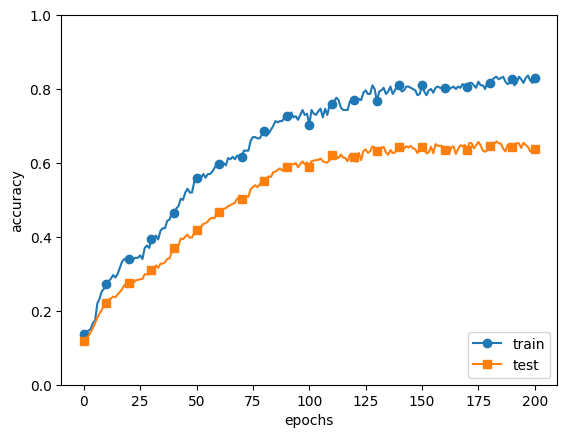

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 가중치 감소
- 의미: 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제한다.
- 가중치의 제곱 노름을 손실함수에 더한다.

epoch:0, train acc:0.11333333333333333, test acc:0.1061
epoch:1, train acc:0.14, test acc:0.1108
epoch:2, train acc:0.15, test acc:0.1105
epoch:3, train acc:0.16666666666666666, test acc:0.1184
epoch:4, train acc:0.17333333333333334, test acc:0.1188
epoch:5, train acc:0.18333333333333332, test acc:0.1268
epoch:6, train acc:0.17666666666666667, test acc:0.1305
epoch:7, train acc:0.19, test acc:0.1437
epoch:8, train acc:0.20333333333333334, test acc:0.1531
epoch:9, train acc:0.24333333333333335, test acc:0.1779
epoch:10, train acc:0.25666666666666665, test acc:0.1879
epoch:11, train acc:0.29333333333333333, test acc:0.2018
epoch:12, train acc:0.32666666666666666, test acc:0.2324
epoch:13, train acc:0.32666666666666666, test acc:0.2378
epoch:14, train acc:0.42333333333333334, test acc:0.2858
epoch:15, train acc:0.46, test acc:0.3177
epoch:16, train acc:0.5166666666666667, test acc:0.346
epoch:17, train acc:0.5433333333333333, test acc:0.3657
epoch:18, train acc:0.5433333333333333, test ac

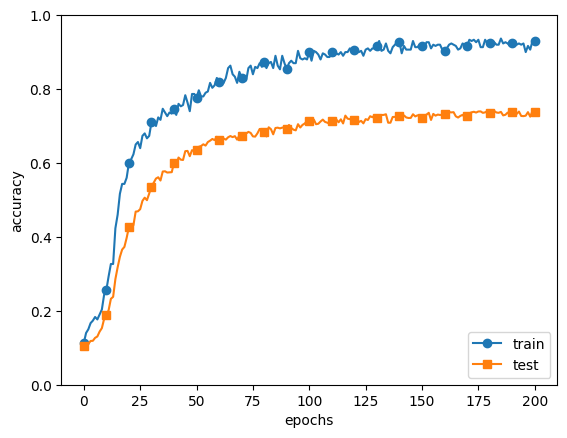

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃
- 의미: 뉴런을 임의로 삭제하면서 학습하는 방법
- 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다. 그래서 다음 계층에 신호를 전달하지 않는다
- 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력
- 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, 순전파ㄷ 때 통고시키지 않은 뉴런은 역전파 때도 신호를 차단한다.

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train loss:2.307171876927934
=== epoch:1, train acc:0.14, test acc:0.1208 ===
train loss:2.301969398692772
train loss:2.2991710156823997
train loss:2.2861224233604553
=== epoch:2, train acc:0.14, test acc:0.1223 ===
train loss:2.293263656140849
train loss:2.279601151399588
train loss:2.3026716863720846
=== epoch:3, train acc:0.14, test acc:0.1234 ===
train loss:2.3108568076006564
train loss:2.3041345843686476
train loss:2.28611231388914
=== epoch:4, train acc:0.14, test acc:0.1238 ===
train loss:2.278193137122859
train loss:2.3047979916070465
train loss:2.287774364229335
=== epoch:5, train acc:0.14, test acc:0.125 ===
train loss:2.2994771053133825
train loss:2.302464507302616
train loss:2.26787

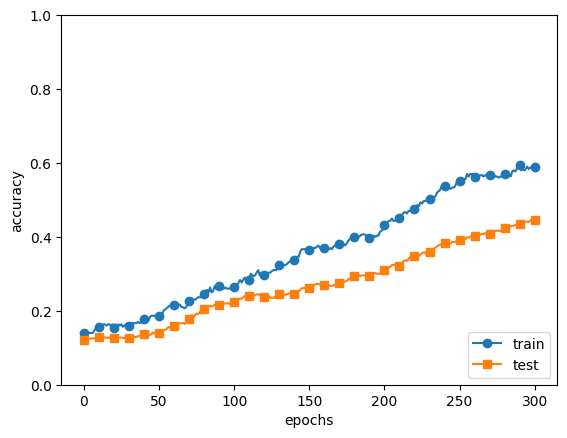

In [6]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 적절한 하이퍼 파라미터 값 찾기
하이퍼파라미터란
- 각 층의 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소
- 하이퍼파라미터의 값을 적절히 설정하지 않으면 모델의 성능이 크게 떨어지기도 한다.
### 검증 데이터
- 하이퍼파라미터 전용 확인 데이터
- 하이퍼파라미터의 적절성을 평가한다.


In [9]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블

    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

(x_train, t_train), (x_test, t_test) = load_mnist()

#훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

#20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 하이퍼파라미터 최적화
- 하이퍼파라미터의 '최적 값'이 존재하는 범위를 조금씩 줄여나간다.
- 하이퍼파라미터의 범위는 '대략적으로' 지정해야 효과적이다.
  - 10의 거듭제곱 단위로 범위를 지정하는데 이를 '로그 스케일'이라고 한다.
- 학습을 위한 에폭을 작게 하여, 1회 평가에 걸리는 시간을 단축하는 것이 효과적이다.
- 단계
  - 0단계: 하이퍼파라미터의 값의 범위를 설정한다.
  - 1단계: 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.
  - 2단계: 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확도를 평가한다.(단, 에폭은 작게 설정한다.)
  - 3단계: 1단계와 2단계를 특정 횟수(100회 등) 반복하며, 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

### 하이퍼파라미터 최적화 구현하기
- 무작위로 추출한 값을 사용하여 학습을 수행한다.

val acc:0.09 | lr:1.0422908731011751e-06, weight decay:3.808219139129754e-05
val acc:0.08 | lr:2.8952554944564167e-06, weight decay:8.455592537601328e-05
val acc:0.12 | lr:0.00012575519913132072, weight decay:1.800067078595593e-05
val acc:0.06 | lr:1.8415537866481394e-05, weight decay:1.3950050359334973e-05
val acc:0.46 | lr:0.0017586953933381457, weight decay:3.6848933394727786e-08
val acc:0.12 | lr:5.3005293884993105e-06, weight decay:1.0688643422046921e-07
val acc:0.37 | lr:0.0028485693740024592, weight decay:1.7889687737755176e-06
val acc:0.09 | lr:1.1681642281635292e-06, weight decay:2.0874955971721315e-08
val acc:0.48 | lr:0.0036728617194766297, weight decay:8.191895087169971e-06
val acc:0.25 | lr:0.0007395163198618056, weight decay:2.9524202634410425e-05
val acc:0.12 | lr:1.6980265689631892e-06, weight decay:1.9304149767584328e-05
val acc:0.3 | lr:0.0010181574936970728, weight decay:1.7499702733810198e-08
val acc:0.08 | lr:1.551786290170056e-05, weight decay:2.1177217754618384e-

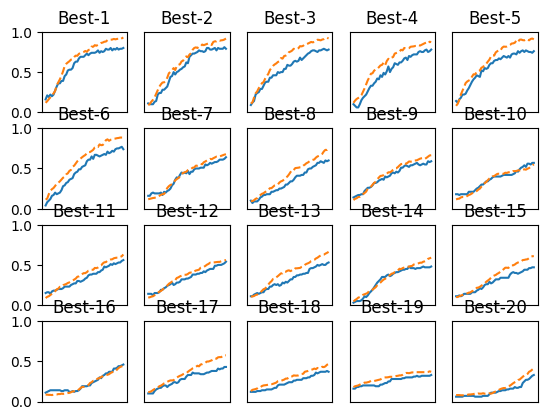

In [11]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()